In [3]:
from filter import clean
from time import time
import pandas as pd
import numpy as np

<AxesSubplot:>

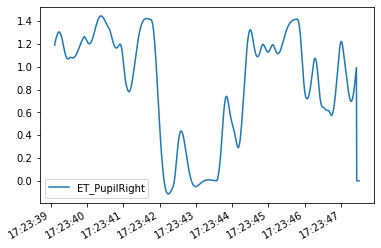

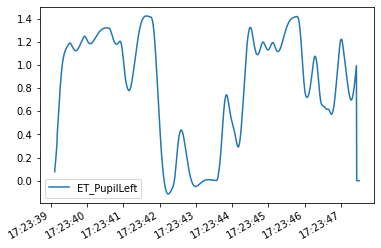

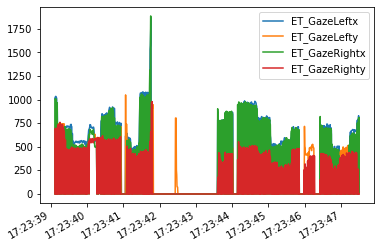

In [4]:
# import data
df = pd.read_csv('./data.csv',comment='#',low_memory=False)
# convert to absolute timestamp (imotions exports timedelta in ms)
date_base = time() * 1000
df['Timestamp'] = (df['Timestamp'] + date_base)
df['Timestamp'] = (df['Timestamp'] * 1000).astype('int64')

# make a copy (optionally remove na data)
prepared = df.copy() #dropna(subset=['ET_PupilRight', 'ET_PupilLeft', 'ET_GazeLeftx', 'ET_GazeLefty', 'ET_GazeRightx', 'ET_GazeRighty'])
# force int type for timestamp
prepared['Timestamp'] = prepared['Timestamp'].astype('int64')
# replace -1 with nan
prepared['ET_PupilRight'] = prepared['ET_PupilRight'].apply(lambda x: x if x > 0 else np.nan)
prepared['ET_PupilLeft'] = prepared['ET_PupilLeft'].apply(lambda x: x if x > 0 else np.nan)
# call dcap
cleaned = clean(prepared)
# force int type for timestamp
cleaned['Timestamp'] = cleaned['Timestamp'].astype('int64')
# stet datetime index
cleaned = cleaned.set_index(pd.to_datetime(cleaned['Timestamp'].values, unit="us"))
# print data
cleaned[['ET_PupilRight']].plot()
cleaned[['ET_PupilLeft']].plot()
cleaned[['ET_GazeLeftx', 'ET_GazeLefty', 'ET_GazeRightx', 'ET_GazeRighty']].plot()